<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "DailyDelhiClimateTest.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shubhi13/dailydelhiclimatetest",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1415120715.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 6.93k/6.93k [00:00<00:00, 6.95MB/s]

First 5 records:          date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [5]:
df= df[['date','meantemp']]

In [7]:
df.sample(5)

,date,meantemp
51,2017-02-21,21.833333
62,2017-03-04,19.125000
13,2017-01-14,13.200000
85,2017-03-27,29.500000
72,2017-03-14,18.000000


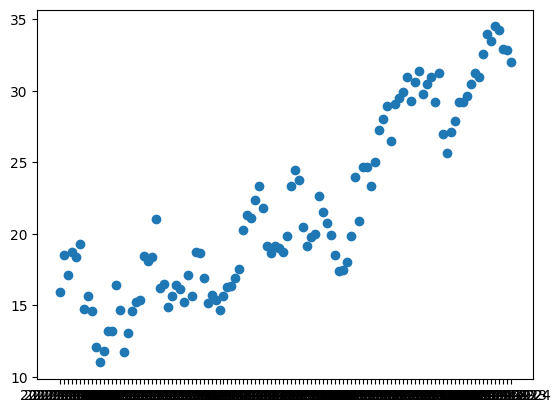

In [8]:
plt.scatter(df['date'],df['meantemp'])

# for alpha = 0.9

In [9]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [10]:
x1

,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


In [11]:
df['ewma'] = x1

/tmp/ipython-input-2986225253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewma'] = x1


In [12]:
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


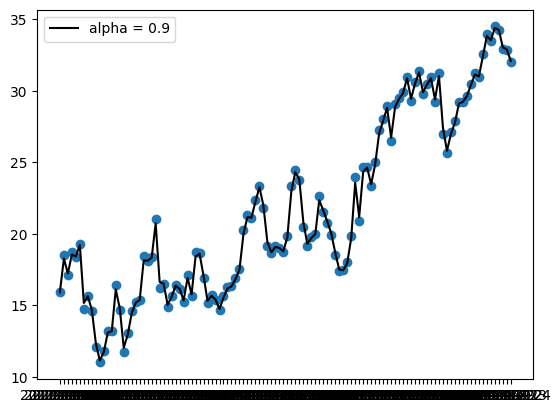

In [13]:
plt.scatter(df['date'],df['meantemp'])
plt.plot(df['date'],x1,color='black',label='alpha = 0.9')
plt.legend()
plt.show()

# for alpha = 0.5


In [19]:
x2 = df['meantemp'].ewm(alpha=0.5).mean()

df['ewma2'] = x2

/tmp/ipython-input-1318179578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewma2'] = x2


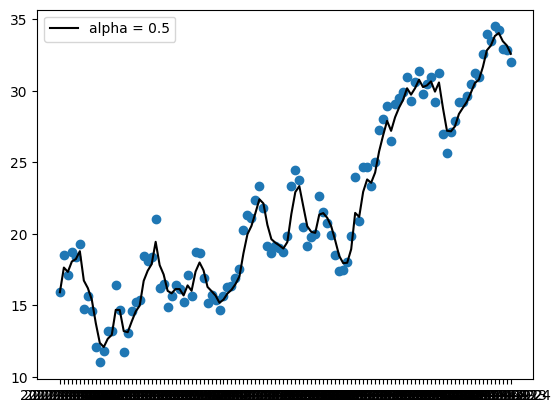

In [20]:
plt.scatter(df['date'],df['meantemp'])
plt.plot(df['date'],x2,color='black',label='alpha = 0.5')
plt.legend()
plt.show()